In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")


<div class="usecase-title">Business Establishments Data Collection</div>
<div class="usecase-authors">Authored by: Jnaneshwari Beerappa</div>
<div class="usecase-duration">Duration: 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level">Level: Intermediate</div>
    <div class="usecase-skill">Pre-requisite Skills: Python, API requests, DataFrame manipulation</div>
</div>

<div class="usecase-section-header">Scenario</div>
Using User Story format, writing a description of use case.

<div class="usecase-section-header">What this use case will teach you</div>
At the end of this use case, we will:
- Learn how to make API requests to a public data portal
- Learn how to handle and manipulate CSV data using pandas
- Understand how to clean and preprocess data for analysis
- Gain experience in visualizing data using Python libraries

<div class="usecase-section-header">Introduction</div>
Understanding the distribution and classification of business establishments is crucial for urban planning, economic development, and policy-making. By collecting data from the City of Melbourne's open data portal, we can gain insights into the business landscape of the city. This use case demonstrates how to fetch, clean, and analyze this data to provide valuable insights.

<div class="usecase-section-header">Implementation</div>

The implementation involves the following steps:
1. Data Collection: Using Python to make an API call to the City of Melbourne's data portal and retrieve the dataset.

2. Data Cleaning: Preprocessing the data to handle missing values and ensure it is in a tidy format.

3. Data Analysis: Analyzing the data to understand the distribution of business establishments.

4. Data Visualization: Creating visualizations to present the findings in an easy-to-understand manner.


In [3]:
import requests
import pandas as pd
from io import StringIO

# Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = "" # use if datasets require API key permissions
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        # 'api_key': apikey  # use if datasets require API key permissions
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

# Set dataset_id to query for the API call
dataset_id = 'business-establishments-with-address-and-industry-classification'

# Save dataset to df variable
df = collect_data(dataset_id)

# Check number of records in df
print(f'The dataset contains {len(df)} records.')

# View df
df.head(3)


The dataset contains 374210 records.


,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude
0,2003,105,100172,100172,Melbourne (CBD),Wilson Parking Australia,24-46 A'Beckett Street MELBOURNE 3000,9533,Parking Services,144.962053,-37.808573
1,2003,105,103301,103301,Melbourne (CBD),Melbourne International Backpackers,442-450 Elizabeth Street MELBOURNE 3000,4400,Accommodation,144.960868,-37.808309
2,2003,105,103302,103302,Melbourne (CBD),Vacant,422-440 Elizabeth Street MELBOURNE 3000,0,Vacant Space,144.961017,-37.808630


<div class="usecase-subsection-header">Step 2: Inspect Column Names</div>


In [5]:
# Inspect column names
print(df.columns)


Index(['census_year', 'block_id', 'property_id', 'base_property_id',
       'clue_small_area', 'trading_name', 'business_address',
       'industry_anzsic4_code', 'industry_anzsic4_description', 'longitude',
       'latitude'],
      dtype='object')


<div class="usecase-subsection-header">Step 3: Data Cleaning</div>


In [6]:
# Check for missing values
df.isnull().sum()

# Fill missing values or drop rows/columns as necessary
df = df.dropna()  # Example: Dropping rows with missing values

# Verify the data is clean
df.head()


,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude
0,2003,105,100172,100172,Melbourne (CBD),Wilson Parking Australia,24-46 A'Beckett Street MELBOURNE 3000,9533,Parking Services,144.962053,-37.808573
1,2003,105,103301,103301,Melbourne (CBD),Melbourne International Backpackers,442-450 Elizabeth Street MELBOURNE 3000,4400,Accommodation,144.960868,-37.808309
2,2003,105,103302,103302,Melbourne (CBD),Vacant,422-440 Elizabeth Street MELBOURNE 3000,0,Vacant Space,144.961017,-37.808630
3,2003,105,103302,103302,Melbourne (CBD),The Garden Cafe,"Shop 3, Ground , 422-440 Elizabeth Street MELB...",4511,Cafes and Restaurants,144.961017,-37.808630
4,2003,105,103302,103302,Melbourne (CBD),Telephony Australia,"Shop 5, Ground , 422-440 Elizabeth Street MELB...",5809,Other Telecommunications Services,144.961017,-37.808630


<div class="usecase-subsection-header">Step 4: Data Analysis</div>


In [7]:
# Analysis: Number of businesses by industry classification
industry_column = 'industry_anzsic4_description'
industry_counts = df[industry_column].value_counts()
print(industry_counts)


industry_anzsic4_description
Vacant Space                                                       56221
Cafes and Restaurants                                              29373
Legal Services                                                     13371
Takeaway Food Services                                             11185
Computer System Design and Related Services                         9456
                                                                   ...  
Leather Tanning, Fur Dressing and Leather Product Manufacturing        2
Other Basic Polymer Manufacturing                                      2
Veterinary Pharmaceutical and Medicinal Product Manufacturing          2
Beef Cattle Farming (Specialised)                                      1
Other Basic Chemical Product Manufacturing n.e.c.                      1
Name: count, Length: 441, dtype: int64


<div class="usecase-subsection-header">Step 5: Data Visualization</div>

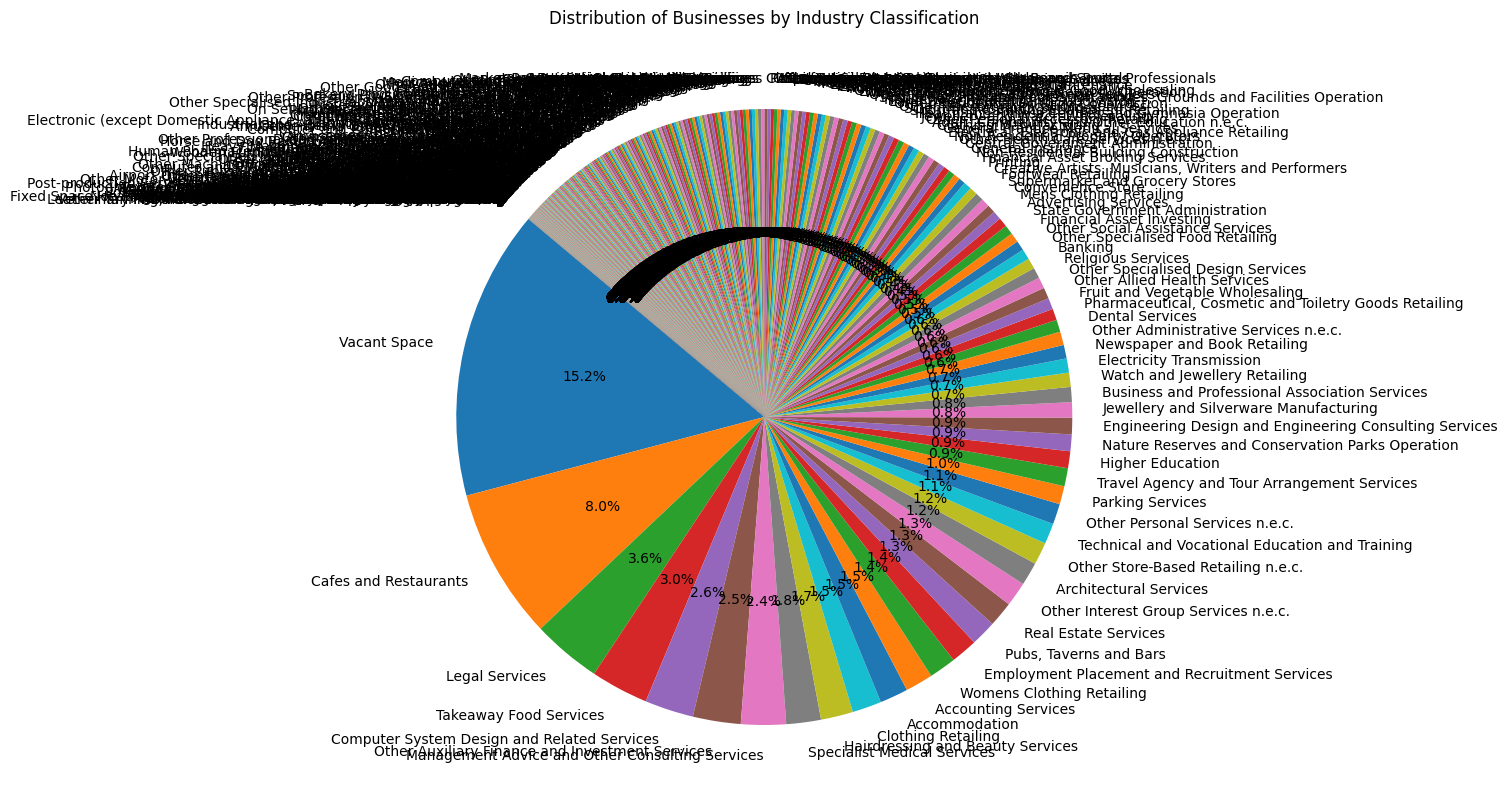

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of businesses by industry classification as a pie chart
plt.figure(figsize=(10,10))
industry_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Businesses by Industry Classification')
plt.ylabel('')  # Hide the y-label
plt.show()
